# ***OPTIMIZATION OF UNIVARIATE FUNCTIONS***

>* We assume that $f$ is a univariate real function  
    $f : \mathcal{D} \subset \mathbb{R} \rightarrow \mathbb{R}$  
    that has only one exact minimizer  $x^{*} = argmin_{x \in \mathcal{D}}f(x)$  
    for convenience, we assume that $\mathcal{D} = [a, b]$ for some constants $a, b \in \mathbb{R}$ if there is no specification    
* Several algorithms for obtaining a sequence $\{x_n \}_{n \ge 1}$ in $\mathcal{D}$ that satisfies  
    $\exists n \in \mathbb{N} \quad s.t. |x_n-x^{*}| < \epsilon$  for a given error bound $\epsilon > 0$  
* Put $\hat{x} = x_n$ as an approximated minimizer of $f$

---
## **1. Grid Search Algorithm**

### **[type1]**  
>1. Take an interger $n>0$ such that $h=(b-a)/n <\epsilon$  
2. Construct a set of candidate points $\mathcal{S}$, where  
$S = \{ z_0=a, \cdots , z_k=a+kh, \cdots, z_n=b\}$  
3. Then find a value in $\mathcal{S}$ that makes $f$ the smallest, that is, 
$\hat{x}=argmin_{z \in \mathcal{S}}|f(z)|$  

* **Computational cost**  
    : If should try unexpectedly many values(too large $n$) then it is better to give up.   
* **Although the grid search algorithm has such a deficiency, it must be a starting point of solving problem.**  
* **If $f$ is not continuous, sometimes the grid search is the only possible method.**

### **[type2]**  
>1. Take an integer $n>0$ such that $h=(b-a)/n < \epsilon$ and set $x_1=a$  
2. For $k=1, 2, \cdots, $   
    1) Set $x_{n+1} = x_n + h = a+nh$  
    2) If $f(x_{n+1})>f(x_n)$ then stop.  
3. Set $\hat{x}=x_n$  

* **Computational cost**  
: The algorithm type2 can reduce computational cost. 

### **[type3]**  
>1. Take an integer $m>0$ (a fixed constant, e.g., $m=10$ is sufficient)  
2. Set $a_1=a, b_1=b$ and $x_1 = (a_1+b_1)/2$  
3. For $n=1, 2, \cdots, $  
    * Set $z_1=a_n$ and $h_n=(b_n-a_n)/m$  
    * For $k=1, 2, \cdots, $  
        + Set $z_{k+1}=z_k+h_n=a_n+kh_n$  
        + If $f(z_{k+1}) > f(z_k)$ then stop  
    * Set $a_{n+1}=max \{a_n, z_n-h_n\}, b_{n+1}=z_{k+1}$ and $x_{n+1}=(a_{n+1}+b_{n+1})/2$  
    * If $|x_{n+1}-x_n|<\epsilon$ then stop  
4. Set $\hat{x}=x_n$  

* **Computational cost**  
: Reducing the computational cost further.

### **[example1]**  
* **Minimizing a quadratic function**  
: Let's minimize a quadratic function $f(x)=exp(-x)+x^2$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [ ]:
def exp_fn(x):
    return np.exp(-x) + x**2

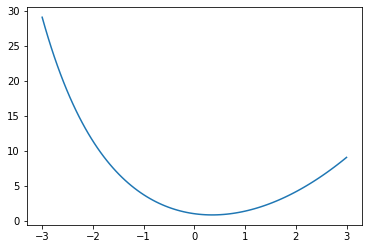

In [ ]:
x = np.linspace(-3, 3, 100)
y = exp_fn(x)
plt.plot(x, y)
plt.show()

***Grid Search Algorithm - type1***

In [ ]:
def gridSearch1(a, b, grid_n=10, eps=1e-7):
    x = np.linspace(a, b, grid_n)
    y = exp_fn(x)
    idx_min = y.argmin()
    return x[idx_min], y[idx_min]

In [ ]:
a = -3
b = 3
gridSearch1(a, b)

(0.33333333333333304, 0.8276424216849004)

***Grid Search Algorithm - type2***

In [ ]:
def gridSearch2(a, b, grid_n=10, eps=1e-7):
    x = np.linspace(a, b, grid_n)
    for i in range(grid_n - 1):
        left = exp_fn(x[i])
        right = exp_fn(x[i + 1])
        if left < right:
            break
    return x[i], left

In [ ]:
gridSearch2(a, b)

(0.33333333333333304, 0.8276424216849004)

***Grid Search Algorithm - type3***

In [ ]:
def gridSearch3(a, b, grid_n=10, eps=1e-7, iter_max=1000):
    for i in range(iter_max):
        if b - a < eps: break
        x = np.linspace(a, b, grid_n)
        for j in range(1, (grid_n - 1)):
            c = exp_fn(x[j])
            d = exp_fn(x[j + 1])
            if d > c: break
        a = x[j - 1]
        b = x[j + 1]
        print(a, b)
    x_min = a
    f_min = exp_fn(a)
    return x_min, f_min, i

In [ ]:
gridSearch3(a, b)

-0.3333333333333335 1.0
0.2592592592592592 0.5555555555555556
0.3251028806584362 0.39094650205761317
0.34705075445816186 0.3616826703246456
0.3503022913173805 0.3535538281765991
0.35138613693712 0.35210870068361305
0.35162699151928434 0.35178756124072724
0.35171619692008593 0.3517518790804066
0.35172809097352614 0.3517360203424863
0.351732496178504 0.35173425826049515
0.3517334751129435 0.35173386668671935
0.3517336491457328 0.3517337361621274


(0.3517336491457328, 0.8271840261275295, 12)

### **[example2]**  
**Assume that we have $n$ samples $y_1, \cdots, y_n$. Let's minimize followings.**  
* **Least Sqaure Loss**  
>$f(\mu) = \sum^{n}_{i=1}L(y_i-\mu)$ , where $L(t)=t^2$  
Apply the Grid Search algorithm with $a=min\{y_1, \cdots, y_n\}$ and $b=max\{y_1, \cdots, y_n\}$.  
The true minimizer $\mu^{*} = \bar{y} = (y_1, \cdots, y_n)/n$  

* **Absolute Deviation Loss**
>$f(\mu) = \sum^{n}_{i=1}L(y_i-\mu)$ , where $L(t)=|t|$  
Apply the Grid Search algorithm with $a=min\{y_1, \cdots, y_n\}$ and $b=max\{y_1, \cdots, y_n\}$.  
The true minimizer $\mu^{*} = median(y_1, \cdots, y_n)$  

* **Least Absolute Shrinkage and Selecton Operator :LASSO**  
>$f(\mu) = \sum^{n}_{i=1}L(y_i-\mu) + \lambda|\mu|$ , for $\lambda>0$, where $L$ can be any kind of loss.  
Apply the Grid Search algorithm with $a=min\{y_1, \cdots, y_n\}$ and $b=max\{y_1, \cdots, y_n\}$.  
The true minimizer $\mu^{*} = sign(\bar{y})(|\bar{y}|-\lambda)_{+}$, where $x_{+} = xI(x>0)$ for the square loss 

In [ ]:
def getLoss(y, mu, method, lam):
    if method == 'abs':
        loss = np.abs(y - mu).mean()
    elif method == 'lasso':
        loss = np.mean((y - mu)**2) + lam * np.abs(mu)
    else:
        loss = np.mean((y - mu)**2)
    return loss

In [ ]:
def gridSearch(y, method, lam=1, grid_n=10, eps=1e-7, iter_max=100):
    a = y.min()
    b = y.max()
    for i in range(iter_max):
        if b - a < eps: break
        mu = np.linspace(a, b, grid_n)
        for j in range(1, grid_n - 1):
            c = getLoss(y, mu[j], method, lam)
            d = getLoss(y, mu[j + 1], method, lam)
            if d > c: break
        a = mu[j - 1]
        b = mu[j + 1]
    return a

In [ ]:
n = 100
y = np.random.uniform(size=n)
print(gridSearch(y, 'sq'), y.mean())
print(gridSearch(y, 'abs'), np.median(y))

0.5029012092476891 0.5029012403174246
0.4994848201202787 0.49873023310463754


In [ ]:
result = []
true = []
lam = np.linspace(0.1, 2, 10)
for l in lam:
    y_mean = y.mean()
    mu_star = np.sign(y_mean)*(abs(y_mean) - l)*(abs(y_mean) > l)
    true.append(mu_star)
    result.append(gridSearch(y, 'lasso', l))

In [ ]:
pd.DataFrame([lam, result, true], index=['lambda', 'mu_hat', 'mu_star']).T

,lambda,mu_hat,mu_star
0,0.100000,0.452901,0.402901
1,0.311111,0.347346,0.191790
2,0.522222,0.241790,-0.000000
3,0.733333,0.136235,-0.000000
4,0.944444,0.030679,-0.000000
5,1.155556,0.002006,-0.000000
6,1.366667,0.002006,-0.000000
7,1.577778,0.002006,-0.000000
8,1.788889,0.002006,-0.000000
9,2.000000,0.002006,-0.000000


## **2. Bisection Algorithm**

* **Root Finding Problem**  
: Find a root or solution $x^*$ of the equation $g(x) = 0, x \in [a, b]$  
, where g is continuous and $g(a)g(b) < 0$  
: Recall that this is equivalent to finding the unique minimizer of $f$, if $g(x) = \frac{df(x)}{dx}$ is strictly convex  

* **Intermediate value theorem**  
: Suppose $g:[a, b] \rightarrow \mathbb{R}$ is continuous, $g(a)$ and $g(b)$ are of opposite sign.  
Then there exists a point $x \in (a, b)$ such that $g(x)=0$  

>1. Set $a_1=a, b_1=b$ and $x_1 = (a+b)/2$  
2. For $n=1, 2, \cdots$  
    (1) If $g(x_n)g(a_n) > 0$ then set $a_{n+1}=x_n$ and $b_{b+1} = b_n$  
    If $g(x_n)g(a_n) < 0$ then set $a_{n+1}=a_n$ and $b_{b+1} = x_n$  
    (2) Set $x_{n+1} = (a_{n+1}+b_{n+1})/2$  
    (3) If $|x_{n+1}-x_n| < \epsilon$ then stop
3. set $\hat{x}=x_n$

- Note that $x^* \in (a_n, b_n)$ for any $n \in \mathbb{N}$     
    

### **[example 1]**  
* **Shortest Confidence Interval**  
: Let $f: \mathcal{D} \rightarrow \mathbb{R}$ be a continuous density function that is unimodel, that is, $f$ has the only maximizer.  
    + For a given constant $\alpha \in (0, 1)$, we want to find the shortest confidence interval with confidence level $\alpha$, $I_{\alpha} = [\mathit{l}_{\alpha}, \mathit{u}_{\alpha}]$, that satisfies $F(\mathit{l}_{\alpha}) - F(\mathit{u}_{\alpha}) = \alpha$, where $F(x) = \int^{x}_{-\infty}f(z)dz$ is the distribution fucntion  
    + $I_{\alpha}$ must satisfy $f(\mathit{l}_{\alpha}) = f(\mathit{u}_{\alpha}) = \lambda_{\alpha}$ for some constant $\lambda_{\alpha}>0$  
    + Hence, the problem is equivalent to finding $\lambda_{\alpha}$ that is a solution of the equation $g(\lambda) \equiv F(b_{\lambda}) - F(\alpha_{\lambda}) - \alpha = 0$, where $f(a_{\lambda}) = f(b_{\lambda}) = \lambda$

In [ ]:
import scipy.stats as stats

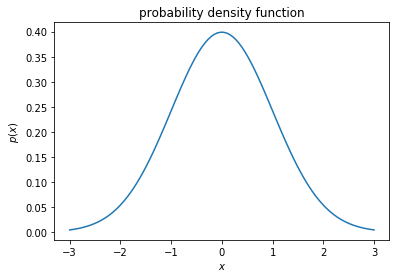

In [ ]:
dist = stats.norm(0, 1)
b = np.linspace(-3, 3, 100)
pdf = dist.pdf(b)

plt.plot(b, pdf)
plt.title("probability density function")
plt.xlabel("$x$")
plt.ylabel("$p(x)$")
plt.show()

$f(b_{\lambda}) = \lambda \Leftrightarrow f(b_{\lambda}) -\lambda = 0$

In [ ]:
def getDiff(b, lam):
    dist = stats.norm(0, 1)
    pdf = dist.pdf(b)
    return pdf - lam

In [ ]:
def findPoint(lam, b_min=0, b_max=6, eps=1e-7, iter_max=100):
    for i in range(iter_max):
        b_cen = (b_max + b_min) / 2
        if getDiff(b_cen, lam) * getDiff(b_max, lam) > 0:
            b_max = b_cen
        else:
            b_min = b_cen
        if b_max - b_min < eps: break
    return b_cen

In [ ]:
print(dist.pdf(findPoint(0.3))) # =lam
print(dist.pdf(-findPoint(0.3))) # =lam

0.2999999913223477
0.2999999913223477


$g(\lambda) \equiv F(b_\lambda) - F(a_\lambda) - \alpha = 0$

In [ ]:
def getCi(alpha, eps=1e-7, iter_max=1000):
    dist = stats.norm(0, 1)
    l_max = dist.pdf(0) - 1e-5
    l_min = 1e-5
    for i in range(iter_max):
        l_cen = (l_max + l_min) / 2
        b_max = findPoint(l_max)
        b_cen = findPoint(l_cen)
        g_max = dist.cdf(b_max) - dist.cdf(-b_max) - alpha
        g_cen = dist.cdf(b_cen) - dist.cdf(-b_cen) - alpha
        if g_max*g_cen > 0: l_max = l_cen
        else: l_min = l_cen
        if l_max - l_min < eps: break
    u_lam = findPoint(l_max)
    l_lam = -u_lam
    return l_lam, u_lam

In [ ]:
ci = getCi(alpha=0.95)
print(ci)
print(dist.cdf(ci[1])-dist.cdf(ci[0]))

(-1.9599635303020477, 1.9599635303020477)
0.9499999469040323


### **[example 2]**  
* **Huber Loss**  
: Assume that we have $n$ samples $y_1, \cdots, y_n$ and want to minimize $f(\mu) = \sum^{n}_{i=1}L_{\delta}(y_i-\mu)$  
,where $L_{\delta}(t) = t^2I(|t|<\delta) + (2\delta|t| - \delta^{2})I(|t| \ge \delta)$ for some constant $\delta > 0$  
    + $\frac{dL_{\delta}(t)}{dt} = 2tI(|t| < \delta) + 2\delta sign(t)I(|t| \ge \delta)$  
    + the problem is equivalent to solve  
    $g(\mu) \equiv \frac{df(\mu)}{d\mu} = \sum^{n}_{i=1}\frac{dL_{\delta}(t)}{dt}\frac{dt}{d\mu}$, $t = y_i - \mu$  
    $= \sum^{n}_{i=1}\{2(\mu-y_i)I(|\mu-y_i|<\delta)+2\delta sign(\mu-y_i)I(|\mu-y_i| \ge \delta)\}$  
    $=0$
    

In [ ]:
def huberLoss(y, mu, delta):
    diff = mu - y
    loss = sum(2*np.minimum(abs(diff), delta)*np.sign(diff))
    return loss

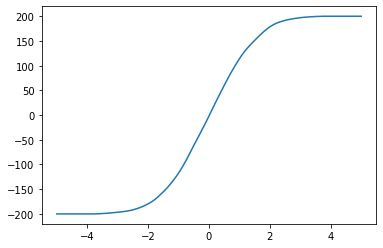

In [ ]:
# plot when delta = 1
n = 100
delta = 1
y = np.random.normal(0, 1, n)
mu = np.linspace(-5, 5, n)
loss = []
for m in mu:
    loss.append(huberLoss(y, m, delta))

plt.plot(mu, loss)
plt.show()

In [ ]:
def huberBisection(y, delta=1, eps=1e-7, iter_max=1000):
    b_min = y.min()
    b_max = y.max()
    for i in range(iter_max):
        b_cen = (b_min + b_max) / 2
        loss_min = huberLoss(y, b_min, delta)
        loss_cen = huberLoss(y, b_cen, delta)
        if loss_min * loss_cen > 0: b_min = b_cen
        else: b_max = b_cen
        
        if b_max - b_min < eps: break
    return b_min, loss_min

In [ ]:
huberBisection(y)

(0.015169264857177102, -2.0618406481869023e-05)

## **3. Fixed Point Iteration**

* **Fixed Point**  
: Let $g:[a,b] \rightarrow [a, b]$ be a real function. If $x^* \in [a, b]$ is a solution of the equation $g(x)=x$,  
then we say $x^* \in [a, b]$ is a fixed point of $g$   
: Assume for simplicity that the fixed porint $x^* \in [a, b] $ of $g$ is unique  

>1. Set an initial $x_1 \in [a, b]$  
2. For $n=1, 2, \cdots, $  
    (1) Set $x_{n+1} = g(x_n)$  
    (2) If $|x_{n+1}-x_n| < \epsilon$ then stop
3. Set $\hat{x} = x_n$

* Note that the solution $x^*$ satisfies the equation $f(x) = g(x) -x =0$

## **4. Equal Interval Search Algorithm**

* **Equal Interval Search Algorithm does not require differentiability**  
: Fixed point iteration and Bisection algorithm use the idea of substituting minimization problem  
$x^* = argmin_{x \ in [a, b]}f(x)$  with root finding problem $\frac{df(x)}{dx} = g(x) = 0$  
assuming that $f$ is differetiable over $[a, b]$  

>1. Set $x_1 = a$ and $y_1=b$  
2. For $n=1, 2, \cdots, $  
    (1) If $|y_n-x_n|<\epsilon$ then stop  
    (2) Set $z_n = (x_n+y_n)/2 - \epsilon / 2$ and $w_n = (x_n+y_n)/2 + \epsilon /2$  
    (3) If $f(z_n) < f(w_n)$ then set $x_{n+1} = z_n$ and $y_{n+1} = y_n$  
    Else set $x_{n+1} = x_n$ and $y_{n+1} = w_n$  
3. Set $\hat{x} = x_n$
    

## **5. Golden Section Algorithm**

* Consider a continuous function $f:[a, b] \rightarrow \mathbb{R}$  
: The target is to develop an algorithm that constructs a sequence $\{x_n\}_{n \ge 1}$ to obtain an approximated minimizer of $x^* = argmin_{x \in [a, b]}f(x)$  

>1. Set 3 points $x_1<x_2<x_3$ to be $f(x_2) < max\{f(x_1), f(x_3)\}$  
,then it is clear that $x^* \in [x_1, x_3]$  
2. Next, set a new point $x_4 \in [x_2, x_3]$  
    (1) If $f(x_4) > f(x_2)$ then set new triple points $x_1 < x_2 < x_4$  
    clearly, $x^* \in [x_1, x_4]$ and $f(x_2) < max\{f(x_1), f(x_4)\}$  
    (2) If $f(x_4) < f(x_2)$ then set new triple points $x_2 < x_4 < x_3$  
    clearly, $x^* \in [x_2, x_3]$ and $f(x_4) < max\{f(x_2), f(x_3)\}$  
3. Start over with new triple points above for each case.  

* In designing the golden section algorithm, we seek 2 goals  
    + an optimal reduction factor that is a constant for the search  
    + minimal number of function calls  

* **Golden Ratio**  
    + We want the triple points are equally spaced in each iteration to avoid some of them are too close.  
    + Assume that we set $x_2$ and $x_4$ such that $x_2-x_1 = a, x_3-x_2 = b $ and $x_4-x_2=c$  
    for some $0<a<b$ and $c>0$  
    + We want to have $\frac{a}{b} = \frac{c}{a}$ and $\frac{a}{b} = \frac{c}{(b-c)}$  
    + The ratio $\gamma = \frac{b}{a} = (\sqrt{5}+1)/2 = 1.618033988...$ is known as the golden ratio  
    + Let $\alpha = 1/\gamma = (\sqrt{5}-1)/2 = 0.618034...$ then the four points for the first steps above become  
    $x_1<x_2 = \alpha x_1 + (1-\alpha)x_3 < x_4 = (1-\alpha)x_1 +\alpha x_3 <x_3$